# Machine learning Model Building with ML Flow

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import importlib
import amazonprocessing
importlib.reload(amazonprocessing)
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, ParameterGrid
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
import pickle

**Cleaning Data using amazonpreprocessing Module**

In [2]:
amazon=pd.read_csv("amazon_delivery.csv")

In [3]:
amazon=amazonprocessing.amazon_preprocess(amazon)

In [4]:
amazon

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay,Order_day,Pickup_day_part
Order_ID,,,,,,,,,,,,,,,,
ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,15,5,Morning
akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,5,4,Evening
njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,15,5,Morning
rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,10,1,Evening
zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,15,5,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jlxf819993117,30,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,motorcycle,Metropolitian,160,Home,1.489846,10,3,Morning
aevx342135787,21,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,11.007735,15,2,Evening
xnek760674819,30,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,scooter,Metropolitian,80,Home,4.657195,15,4,Night


In [5]:
amazon.head(2)

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Delay,Order_day,Pickup_day_part
Order_ID,,,,,,,,,,,,,,,,
ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,15,5,Morning
akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,5,4,Evening


In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43739 entries, ialx566343618 to nsyz997960170
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Agent_Age        43739 non-null  int64   
 1   Agent_Rating     43739 non-null  float64 
 2   Store_Latitude   43739 non-null  float64 
 3   Store_Longitude  43739 non-null  float64 
 4   Drop_Latitude    43739 non-null  float64 
 5   Drop_Longitude   43739 non-null  float64 
 6   Weather          43739 non-null  object  
 7   Traffic          43739 non-null  object  
 8   Vehicle          43739 non-null  object  
 9   Area             43739 non-null  object  
 10  Delivery_Time    43739 non-null  int64   
 11  Category         43739 non-null  object  
 12  Distance_km      43739 non-null  float64 
 13  Delay            43739 non-null  int64   
 14  Order_day        43739 non-null  int32   
 15  Pickup_day_part  43739 non-null  category
dtypes: category(1), float64(6

In [7]:
amazon.columns

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Weather', 'Traffic', 'Vehicle',
       'Area', 'Delivery_Time', 'Category', 'Distance_km', 'Delay',
       'Order_day', 'Pickup_day_part'],
      dtype='object')

In [8]:
amazon.shape

(43739, 16)

# Model Building

## Preprocessing Data and scaling

In [9]:
amazon.select_dtypes(["object","category"])

,Weather,Traffic,Vehicle,Area,Category,Pickup_day_part
Order_ID,,,,,,
ialx566343618,Sunny,High,motorcycle,Urban,Clothing,Morning
akqg208421122,Stormy,Jam,scooter,Metropolitian,Electronics,Evening
njpu434582536,Sandstorms,Low,motorcycle,Urban,Sports,Morning
rjto796129700,Sunny,Medium,motorcycle,Metropolitian,Cosmetics,Evening
zguw716275638,Cloudy,High,scooter,Metropolitian,Toys,Afternoon
...,...,...,...,...,...,...
jlxf819993117,Windy,High,motorcycle,Metropolitian,Home,Morning
aevx342135787,Windy,Jam,motorcycle,Metropolitian,Jewelry,Evening
xnek760674819,Cloudy,Low,scooter,Metropolitian,Home,Night


### Encoding Categorical data using Labelencoder

In [10]:
label_columns=amazon.select_dtypes(["object","category"]).columns

In [11]:
x_numeric_columns=amazon.select_dtypes(["float","int"]).columns.drop("Delivery_Time")
y_numeric_column="Delivery_Time"

In [12]:
categorical_encoder=OrdinalEncoder()
scaled_data=pd.DataFrame()
scaled_data[label_columns]=pd.DataFrame(categorical_encoder.fit_transform(amazon[label_columns]), columns=label_columns)

In [13]:
with open("categorical_encoder.pkl","wb",) as c:
    pickle.dump(categorical_encoder,c)

In [14]:
x_scaler=StandardScaler()
y_scaler=StandardScaler()
x_scaler.fit(amazon[x_numeric_columns])
y_scaler.fit(amazon[y_numeric_column].values.reshape(-1,1))

,copy,True
,with_mean,True
,with_std,True


In [15]:
# Scaling X variables
scaled_data[x_numeric_columns]=x_scaler.transform(amazon[x_numeric_columns])

# Scaling Target Feature
scaled_data[y_numeric_column]=y_scaler.transform(amazon[y_numeric_column].values.reshape(-1,1))

In [16]:
with open("x_scaler.pkl","wb") as xe:
    pickle.dump(x_scaler,xe)

with open("y_scaler.pkl","wb") as ye:
    pickle.dump(y_scaler, ye)

In [17]:
scaled_data.head(2)

,Weather,Traffic,Vehicle,Area,Category,Pickup_day_part,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Distance_km,Delay,Order_day,Delivery_Time
0,4.0,0.0,1.0,3.0,2.0,2.0,1.278203,0.795595,0.728680,0.242722,0.722609,0.240659,-1.197019,0.072459,1.014917,-0.094494
1,3.0,1.0,2.0,0.0,4.0,1.0,0.762304,-0.400169,-0.610554,0.327381,-0.601399,0.330517,1.865001,-0.149200,0.507255,0.772310


<Axes: >

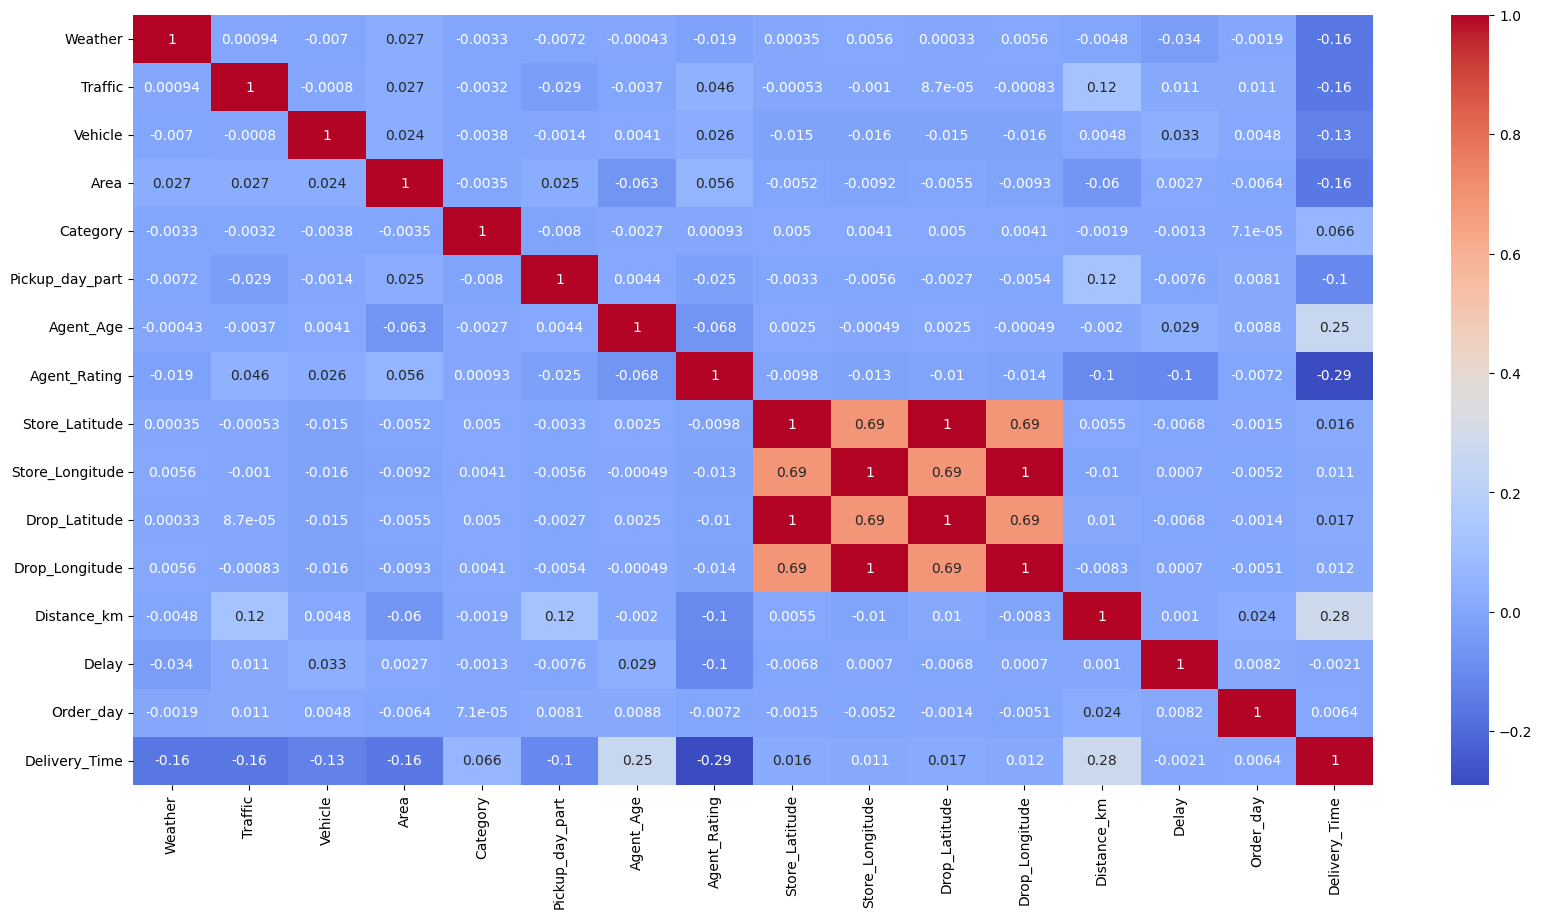

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(scaled_data.corr(), cmap="coolwarm", annot=True)

In [19]:
x=scaled_data.drop("Delivery_Time", axis=1)
y=scaled_data["Delivery_Time"]
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=42)

## Feature Selection Methods

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# ANOVA F-test
x_best = SelectKBest(score_func=f_regression, k=10)
x_best.fit(x,y)
print(f"Best Features Based on f_regression\n {x_best.get_feature_names_out()}")


Best Features Based on f_regression
 ['Weather' 'Traffic' 'Vehicle' 'Area' 'Category' 'Pickup_day_part'
 'Agent_Age' 'Agent_Rating' 'Drop_Latitude' 'Distance_km']


In [21]:
# Mutual information
x_best_1 = SelectKBest(score_func=mutual_info_regression, k=10)
#x_best = SelectKBest(score_func=f_regression, k=10)
x_best_1.fit(x,y)
print(f"Best Features Based on mutual info:\n {x_best_1.get_feature_names_out()}")


Best Features Based on mutual info:
 ['Weather' 'Traffic' 'Area' 'Category' 'Pickup_day_part' 'Agent_Age'
 'Agent_Rating' 'Drop_Latitude' 'Drop_Longitude' 'Distance_km']


In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe_lr = RFE(model, n_features_to_select=10)
X_rfe_lr = rfe_lr.fit_transform(x, y)
print("Selected features:", rfe_lr.get_feature_names_out())


Selected features: ['Traffic' 'Vehicle' 'Pickup_day_part' 'Agent_Age' 'Agent_Rating'
 'Store_Latitude' 'Store_Longitude' 'Drop_Latitude' 'Drop_Longitude'
 'Distance_km']


In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(x, y)
print("Selected features:", rfe.get_feature_names_out())


Selected features: ['Weather' 'Traffic' 'Vehicle' 'Category' 'Agent_Age' 'Agent_Rating'
 'Store_Longitude' 'Drop_Latitude' 'Drop_Longitude' 'Distance_km']


In [24]:
best_features_list=[x_best.get_feature_names_out(),x_best_1.get_feature_names_out(), rfe_lr.get_feature_names_out(),rfe.get_feature_names_out()]

In [25]:
best_features_list

[array(['Weather', 'Traffic', 'Vehicle', 'Area', 'Category',
        'Pickup_day_part', 'Agent_Age', 'Agent_Rating', 'Drop_Latitude',
        'Distance_km'], dtype=object),
 array(['Weather', 'Traffic', 'Area', 'Category', 'Pickup_day_part',
        'Agent_Age', 'Agent_Rating', 'Drop_Latitude', 'Drop_Longitude',
        'Distance_km'], dtype=object),
 array(['Traffic', 'Vehicle', 'Pickup_day_part', 'Agent_Age',
        'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
        'Drop_Latitude', 'Drop_Longitude', 'Distance_km'], dtype=object),
 array(['Weather', 'Traffic', 'Vehicle', 'Category', 'Agent_Age',
        'Agent_Rating', 'Store_Longitude', 'Drop_Latitude',
        'Drop_Longitude', 'Distance_km'], dtype=object)]

In [26]:
# Elastic Net model
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  
# alpha -> regularization strength
# l1_ratio -> 0 (Ridge) to 1 (Lasso)

model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Performance
print("MSE:", mean_squared_error(y_test, y_pred))
print("Coefficients:", model.coef_)

MSE: 0.9885945994292721
Coefficients: [-0. -0. -0. -0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.]


In [27]:
model.score(x_test,y_test)

-0.0001784031714171519

In [28]:
def compute_metrics(actual, predicted):
  rmse = mean_squared_error(actual, predicted)
  mae = mean_absolute_error(actual, predicted)
  r2 = r2_score(actual, predicted)

  return rmse, mae, r2

In [29]:
compute_metrics(y_test,model.predict(x_test))

(0.9885945994292721, 0.7940195146507039, -0.0001784031714171519)

# ML Flow

In [30]:
import mlflow
from mlflow import MlflowClient
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [31]:
best_features_list

[array(['Weather', 'Traffic', 'Vehicle', 'Area', 'Category',
        'Pickup_day_part', 'Agent_Age', 'Agent_Rating', 'Drop_Latitude',
        'Distance_km'], dtype=object),
 array(['Weather', 'Traffic', 'Area', 'Category', 'Pickup_day_part',
        'Agent_Age', 'Agent_Rating', 'Drop_Latitude', 'Drop_Longitude',
        'Distance_km'], dtype=object),
 array(['Traffic', 'Vehicle', 'Pickup_day_part', 'Agent_Age',
        'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
        'Drop_Latitude', 'Drop_Longitude', 'Distance_km'], dtype=object),
 array(['Weather', 'Traffic', 'Vehicle', 'Category', 'Agent_Age',
        'Agent_Rating', 'Store_Longitude', 'Drop_Latitude',
        'Drop_Longitude', 'Distance_km'], dtype=object)]

In [32]:
"""x=scaled_data[best_features_list[0]]
y=scaled_data["Delivery_Time"]
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=42)"""

'x=scaled_data[best_features_list[0]]\ny=scaled_data["Delivery_Time"]\nx_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=42)'

### Random Forest model

In [33]:
mlflow.set_tracking_uri("http://localhost:5000")
run_name = "Random_forest"
try:
    mlflow.create_experiment(
        "Tree_based_Models",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    mlflow.set_experiment("Tree_based_Models")


params = {
    "n_estimators": 500,
    "max_depth": 8,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "bootstrap": True,
    "oob_score": False,
    "random_state": 888,
}

# Train the RandomForestRegressor
rf = RandomForestRegressor(**params, n_jobs=-1)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the validation set
y_pred = rf.predict(x_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Assemble the metrics we're going to write into a collection
metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf, input_example=x_test)

🏃 View run Random_forest at: http://localhost:5000/#/experiments/123136475228091319/runs/097f575736644a21935cd38dc4e325b6
🧪 View experiment at: http://localhost:5000/#/experiments/123136475228091319


### Decision Tree Model

In [34]:
mlflow.set_tracking_uri("http://localhost:5000")
run_name = "Decision Tree"
try:
    mlflow.create_experiment(
        "Tree_based_Models",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    mlflow.set_experiment("Tree_based_Models")


params = {
    "max_depth": 8,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "random_state": 888,
}

# Train the RandomForestRegressor
rf = DecisionTreeRegressor(**params)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the validation set
y_pred = rf.predict(x_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Assemble the metrics we're going to write into a collection
metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf, input_example=x_test)

🏃 View run Decision Tree at: http://localhost:5000/#/experiments/123136475228091319/runs/ac6a5b30e25b458884b8e6fc618071f2
🧪 View experiment at: http://localhost:5000/#/experiments/123136475228091319


### GradientBoostingRegressor

In [35]:
mlflow.set_tracking_uri("http://localhost:5000")
run_name = "GradientBoostingRegressor"
try:
    mlflow.create_experiment(
        "Tree_based_Models",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}", format(e))
    mlflow.set_experiment("Tree_based_Models")


params = {
    "n_estimators": 500,
    "max_depth": 8,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "random_state": 888,
    "learning_rate":0.2
}

# Train the RandomForestRegressor
rf = GradientBoostingRegressor(**params)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the validation set
y_pred = rf.predict(x_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Assemble the metrics we're going to write into a collection
metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf, input_example=x_test)

Experiment name already exists: {} RESOURCE_ALREADY_EXISTS: Experiment 'Tree_based_Models' already exists.
🏃 View run GradientBoostingRegressor at: http://localhost:5000/#/experiments/123136475228091319/runs/aedbd9800cc44dc39f2790eec8ff9d18
🧪 View experiment at: http://localhost:5000/#/experiments/123136475228091319


### XGBOOST

In [36]:
mlflow.set_tracking_uri("http://localhost:5000")
run_name = "XGBOOST"
try:
    mlflow.create_experiment(
        "Tree_based_Models",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}", format(e))
    mlflow.set_experiment("Tree_based_Models")


params = {
    "max_depth": 9,
    "learning_rate": 0.3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
}

from xgboost import XGBRegressor
# Train the xgb
rf = XGBRegressor(**params)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the validation set
y_pred = rf.predict(x_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Assemble the metrics we're going to write into a collection
metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf, input_example=x_test)

Experiment name already exists: {} RESOURCE_ALREADY_EXISTS: Experiment 'Tree_based_Models' already exists.
🏃 View run XGBOOST at: http://localhost:5000/#/experiments/123136475228091319/runs/d98b99c278a448bcb38f5e577c5a1f65
🧪 View experiment at: http://localhost:5000/#/experiments/123136475228091319


### LightGBM

In [37]:
mlflow.set_tracking_uri("http://localhost:5000")
run_name = "LightGBM"
try:
    mlflow.create_experiment(
        "Tree_based_Models",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment("Tree_based_Models")


params = {
"n_estimators":400, "learning_rate":0.1
}

from lightgbm import LGBMRegressor
# Train the xgb
rf = LGBMRegressor(**params)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the validation set
y_pred = rf.predict(x_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Assemble the metrics we're going to write into a collection
metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf, input_example=x_test)

Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Tree_based_Models' already exists.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 34991, number of used features: 15
[LightGBM] [Info] Start training from score 0.002656
🏃 View run LightGBM at: http://localhost:5000/#/experiments/123136475228091319/runs/925af9e3cf434734a6f1493d4bddf786
🧪 View experiment at: http://localhost:5000/#/experiments/123136475228091319


### Catboost Regressor

In [38]:
mlflow.set_tracking_uri("http://localhost:5000")
run_name = "Catboost_Regressor"
try:
    mlflow.create_experiment(
        "Tree_based_Models",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment("Tree_based_Models")


params = {
"n_estimators":400, "learning_rate":0.1, "verbose": 0
}

from catboost import CatBoostRegressor
# Train the xgb
rf = CatBoostRegressor(**params)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the validation set
y_pred = rf.predict(x_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Assemble the metrics we're going to write into a collection
metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf, input_example=x_test)

Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Tree_based_Models' already exists.
🏃 View run Catboost_Regressor at: http://localhost:5000/#/experiments/123136475228091319/runs/413a6c8b9f8c40728c514904163a172a
🧪 View experiment at: http://localhost:5000/#/experiments/123136475228091319


### KNN

In [39]:
from sklearn.neighbors import KNeighborsRegressor
mlflow.set_tracking_uri("http://localhost:5000")
run_name = "KNN"
try:
    mlflow.create_experiment(
        "Tree_based_Models",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment("Tree_based_Models")


params = {
"n_neighbors":8
}


# Train the xgb
rf = KNeighborsRegressor(**params)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict on the validation set
y_pred = rf.predict(x_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Assemble the metrics we're going to write into a collection
metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf, input_example=x_test)

Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Tree_based_Models' already exists.
🏃 View run KNN at: http://localhost:5000/#/experiments/123136475228091319/runs/3381b7a9200046b8a793300d2fcad0b8
🧪 View experiment at: http://localhost:5000/#/experiments/123136475228091319


## Gridsearch and Randomizedsearch Hyperparameter tuning

### RandomizedSearch

In [40]:
best_features_list

[array(['Weather', 'Traffic', 'Vehicle', 'Area', 'Category',
        'Pickup_day_part', 'Agent_Age', 'Agent_Rating', 'Drop_Latitude',
        'Distance_km'], dtype=object),
 array(['Weather', 'Traffic', 'Area', 'Category', 'Pickup_day_part',
        'Agent_Age', 'Agent_Rating', 'Drop_Latitude', 'Drop_Longitude',
        'Distance_km'], dtype=object),
 array(['Traffic', 'Vehicle', 'Pickup_day_part', 'Agent_Age',
        'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
        'Drop_Latitude', 'Drop_Longitude', 'Distance_km'], dtype=object),
 array(['Weather', 'Traffic', 'Vehicle', 'Category', 'Agent_Age',
        'Agent_Rating', 'Store_Longitude', 'Drop_Latitude',
        'Drop_Longitude', 'Distance_km'], dtype=object)]

#### RandomizedsearchCV for randomforest

In [41]:
from sklearn.svm import SVR
mlflow.set_tracking_uri("http://localhost:5000")
run_name = "RandomizedCV"
try:
    mlflow.create_experiment(
        "Hyperprameter_Tuning",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment("Hyperprameter_Tuning")




from scipy.stats import randint, uniform
with mlflow.start_run(run_name=run_name):
    
    param_distributions = {
    "n_estimators": randint(50, 400),
    "max_depth": randint(5, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": uniform(0.1, 0.9),
}
    rfs = RandomForestRegressor(random_state=42, n_jobs=-1)
    rf = RandomizedSearchCV(
        rfs,
        param_distributions,
        n_iter=50,  # Try 50 random combinations
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1,
    )

    rf.fit(x_train, y_train)
    # Predict on the validation set
    y_pred = rf.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Assemble the metrics we're going to write into a collection
    metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}
        # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf, input_example=x_test)

Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Hyperprameter_Tuning' already exists.
🏃 View run RandomizedCV at: http://localhost:5000/#/experiments/884840889504455838/runs/b872a791c1b4415ea593643a204f1c5a
🧪 View experiment at: http://localhost:5000/#/experiments/884840889504455838


#### RandomizedSearchCV for Decision Tree

In [42]:

mlflow.set_tracking_uri("http://localhost:5000")
run_name = "RandomizedCV_DecisionTree"
try:
    mlflow.create_experiment(
        "Hyperprameter_Tuning",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment("Hyperprameter_Tuning")




with mlflow.start_run(run_name=run_name):
    param_distributions = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": [None, "sqrt", "log2"]
}
    rfs = DecisionTreeRegressor(random_state=42)
    rf = RandomizedSearchCV(
        rfs,
        param_distributions,
        n_iter=50,  # Try 50 random combinations
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1,
    )

    rf.fit(x_train, y_train)
    # Predict on the validation set
    y_pred = rf.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Assemble the metrics we're going to write into a collection
    metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}
        # Log the parameters used for the model fit
    mlflow.log_params(rf.best_params_)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf.best_estimator_, input_example=x_test)

Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Hyperprameter_Tuning' already exists.
🏃 View run RandomizedCV_DecisionTree at: http://localhost:5000/#/experiments/884840889504455838/runs/e1a1bf960fe749b9b0bf70fcbb570cfe
🧪 View experiment at: http://localhost:5000/#/experiments/884840889504455838


### RandomizedCV_Gradientboosting

In [43]:

mlflow.set_tracking_uri("http://localhost:5000")
run_name = "RandomizedCV_GradientBoosting"
try:
    mlflow.create_experiment(
        "Hyperprameter_Tuning",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment("Hyperprameter_Tuning")




with mlflow.start_run(run_name=run_name):
    
    param_distributions = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.6, 0.8, 1.0],
    "max_features": ["sqrt", "log2", None]
}
    rfs = GradientBoostingRegressor(random_state=42)
    rf = RandomizedSearchCV(
        rfs,
        param_distributions,
        n_iter=50,  # Try 50 random combinations
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1,
    )

    rf.fit(x_train, y_train)
    # Predict on the validation set
    y_pred = rf.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Assemble the metrics we're going to write into a collection
    metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}
        # Log the parameters used for the model fit
    mlflow.log_params(rf.best_params_)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf.best_estimator_, input_example=x_test)

Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Hyperprameter_Tuning' already exists.
🏃 View run RandomizedCV_GradientBoosting at: http://localhost:5000/#/experiments/884840889504455838/runs/bf81299c3e56450e886f02b027f548cd
🧪 View experiment at: http://localhost:5000/#/experiments/884840889504455838


#### RandomizedCVsearch XGB

In [44]:

mlflow.set_tracking_uri("http://localhost:5000")
run_name = "RandomizedCV_XGB"
try:
    mlflow.create_experiment(
        "Hyperprameter_Tuning",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment("Hyperprameter_Tuning")




with mlflow.start_run(run_name=run_name):
    
    param_distributions = {
    "n_estimators": [100, 200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3, 1],
    "reg_alpha": [0, 0.1, 1, 10],   # L1 regularization
    "reg_lambda": [1, 2, 5, 10]
}
    rfs = XGBRegressor(random_state=42)
    rf = RandomizedSearchCV(
        rfs,
        param_distributions,
        n_iter=50,  # Try 50 random combinations
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1,
    )

    rf.fit(x_train, y_train)
    # Predict on the validation set
    y_pred = rf.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Assemble the metrics we're going to write into a collection
    metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}
        # Log the parameters used for the model fit
    mlflow.log_params(rf.best_params_)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf.best_estimator_, input_example=x_test)

Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Hyperprameter_Tuning' already exists.
🏃 View run RandomizedCV_XGB at: http://localhost:5000/#/experiments/884840889504455838/runs/b383b175506b4a50820acf991787c4aa
🧪 View experiment at: http://localhost:5000/#/experiments/884840889504455838


#### RandomizedCVSearch Catboost

In [45]:

mlflow.set_tracking_uri("http://localhost:5000")
run_name = "RandomizedCV_Catboost"
try:
    mlflow.create_experiment(
        "Hyperprameter_Tuning",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment("Hyperprameter_Tuning")




with mlflow.start_run(run_name=run_name):
    
    param_distributions = {
    "iterations": [200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 10],
    "bagging_temperature": [0, 0.5, 1, 2],
    "random_strength": [0, 1, 2, 5, 10]
}
    rfs = CatBoostRegressor(random_state=42)
    rf = RandomizedSearchCV(
        rfs,
        param_distributions,
        n_iter=50,  # Try 50 random combinations
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1,
    )

    rf.fit(x_train, y_train)
    # Predict on the validation set
    y_pred = rf.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Assemble the metrics we're going to write into a collection
    metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}
        # Log the parameters used for the model fit
    mlflow.log_params(rf.best_params_)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf.best_estimator_, input_example=x_test)

Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Hyperprameter_Tuning' already exists.
0:	learn: 0.9677001	total: 55.3ms	remaining: 27.6s
1:	learn: 0.9358113	total: 106ms	remaining: 26.3s
2:	learn: 0.9056813	total: 162ms	remaining: 26.8s
3:	learn: 0.8772317	total: 216ms	remaining: 26.8s
4:	learn: 0.8503871	total: 274ms	remaining: 27.1s
5:	learn: 0.8250747	total: 330ms	remaining: 27.1s
6:	learn: 0.8010537	total: 382ms	remaining: 26.9s
7:	learn: 0.7784399	total: 437ms	remaining: 26.9s
8:	learn: 0.7571695	total: 490ms	remaining: 26.7s
9:	learn: 0.7371708	total: 546ms	remaining: 26.8s
10:	learn: 0.7163033	total: 599ms	remaining: 26.6s
11:	learn: 0.6984788	total: 652ms	remaining: 26.5s
12:	learn: 0.6799708	total: 702ms	remaining: 26.3s
13:	learn: 0.6642606	total: 757ms	remaining: 26.3s
14:	learn: 0.6495384	total: 811ms	remaining: 26.2s
15:	learn: 0.6340749	total: 869ms	remaining: 26.3s
16:	learn: 0.6211551	total: 922ms	remaining: 26.2s
17:	learn: 0.6075266	total: 971ms	r

#### RandomizedCV LightGBM

In [46]:

mlflow.set_tracking_uri("http://localhost:5000")
run_name = "RandomizedCV_LightGBM"
try:
    mlflow.create_experiment(
        "Hyperprameter_Tuning",
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment("Hyperprameter_Tuning")




with mlflow.start_run(run_name=run_name):
    
    param_distributions = {
    "num_leaves": [15, 31, 63, 127],              # controls complexity
    "max_depth": [-1, 3, 5, 7, 10],               # -1 means no limit
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "n_estimators": [100, 200, 500, 1000],
    "subsample": [0.6, 0.8, 1.0],                 # row sampling
    "colsample_bytree": [0.6, 0.8, 1.0],          # feature sampling
    "min_child_samples": [5, 10, 20, 50, 100],    # min data per leaf
    "reg_alpha": [0, 0.1, 1, 5, 10],              # L1 regularization
    "reg_lambda": [0, 0.1, 1, 5, 10] 
}
    rfs = LGBMRegressor(random_state=42)
    rf = RandomizedSearchCV(
        rfs,
        param_distributions,
        n_iter=50,  # Try 50 random combinations
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1,
    )

    rf.fit(x_train, y_train)
    # Predict on the validation set
    y_pred = rf.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Assemble the metrics we're going to write into a collection
    metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}
        # Log the parameters used for the model fit
    mlflow.log_params(rf.best_params_)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(sk_model=rf.best_estimator_, input_example=x_test)

Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Hyperprameter_Tuning' already exists.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 34991, number of used features: 15
[LightGBM] [Info] Start training from score 0.002656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [50]:
mlflow.get_experiment_by_name("Hyperprameter_Tuning")

<Experiment: artifact_location='mlflow-artifacts:/884840889504455838', creation_time=1759118379858, experiment_id='884840889504455838', last_update_time=1759118379858, lifecycle_stage='active', name='Hyperprameter_Tuning', tags={'mlflow.experimentKind': 'custom_model_development',
 'priority': 'P1',
 'version': 'v1'}>

In [54]:
mlflow.get_experiment("884840889504455838")

<Experiment: artifact_location='mlflow-artifacts:/884840889504455838', creation_time=1759118379858, experiment_id='884840889504455838', last_update_time=1759118379858, lifecycle_stage='active', name='Hyperprameter_Tuning', tags={'mlflow.experimentKind': 'custom_model_development',
 'priority': 'P1',
 'version': 'v1'}>

In [61]:
mlflow.get_run("27f0a336b7a0491bbd7bd1ab53f31625")

<Run: data=<RunData: metrics={'mae': 0.32517334344590926,
 'mse': 0.17349410839437612,
 'r2': 0.8244729837754383,
 'rmse': 0.4165262397429196}, params={'bagging_temperature': '2',
 'depth': '10',
 'iterations': '500',
 'l2_leaf_reg': '10',
 'learning_rate': '0.05',
 'random_strength': '0'}, tags={'mlflow.runName': 'RandomizedCV_Catboost',
 'mlflow.source.name': 'e:\\Labmentrix\\Projects\\Project '
                       '3\\amazon\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'susha'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/884840889504455838/27f0a336b7a0491bbd7bd1ab53f31625/artifacts', end_time=1759289324274, experiment_id='884840889504455838', lifecycle_stage='active', run_id='27f0a336b7a0491bbd7bd1ab53f31625', run_name='RandomizedCV_Catboost', start_time=1759288102425, status='FINISHED', user_id='susha'>, inputs=<RunInputs: dataset_inputs=[], model_inputs=[]>, outputs=<RunOutputs: model_outputs=[<LoggedModelOutput: model_id='m-

### Registering Final Models

#### Catboost Model Registering

In [75]:
from mlflow.models import infer_signature

In [76]:

mlflow.set_tracking_uri("http://localhost:5000")
run_name = "Final_Model_Catboost"
experiment="Finalized_Model"

try:
    mlflow.create_experiment(
        experiment,
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment(experiment)

# CatbOost Model gave Best R2 Score with RMSE, MSE, MAE
params={
    'bagging_temperature': 2,
    'depth': 10,
    'l2_leaf_reg': 10,
    'learning_rate': 0.05,
    'random_strength': 0,
    'iterations': 500, 
    'verbose': 100
}

with mlflow.start_run(run_name=run_name):
    model = CatBoostRegressor(**params)
    model.fit(x_train, y_train)
    # Predict on the validation set
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Assemble the metrics we're going to write into a collection
    metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}
        # Log the parameters used for the model fit
    mlflow.log_params(params)
    signature = infer_signature(x_test, y_pred)
    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(name=run_name,sk_model=model, input_example=x_test, registered_model_name=run_name, signature=signature)    



Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Finalized_Model' already exists.
0:	learn: 0.9677001	total: 44.9ms	remaining: 22.4s
100:	learn: 0.4171149	total: 4.28s	remaining: 16.9s
200:	learn: 0.4126096	total: 7.77s	remaining: 11.6s
300:	learn: 0.4063802	total: 11.3s	remaining: 7.5s
400:	learn: 0.3985324	total: 15.2s	remaining: 3.75s
499:	learn: 0.3902959	total: 18.6s	remaining: 0us


Registered model 'Final_Model_Catboost' already exists. Creating a new version of this model...
2025/10/01 11:15:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Final_Model_Catboost, version 2
Created version '2' of model 'Final_Model_Catboost'.


🏃 View run Final_Model_Catboost at: http://localhost:5000/#/experiments/469161372381912833/runs/64390adc1b8740b6815f58fa672fe619
🧪 View experiment at: http://localhost:5000/#/experiments/469161372381912833


#### LightGBM Model registering

In [77]:
mlflow.get_run("f60b29bccd8d454cb128b84358de435d")

<Run: data=<RunData: metrics={'mae': 0.3279771340365407,
 'mse': 0.17539182901698488,
 'r2': 0.8225530267140887,
 'rmse': 0.41879807666342606}, params={'colsample_bytree': '1.0',
 'learning_rate': '0.01',
 'max_depth': '10',
 'min_child_samples': '20',
 'n_estimators': '1000',
 'num_leaves': '63',
 'reg_alpha': '0',
 'reg_lambda': '0.1',
 'subsample': '1.0'}, tags={'mlflow.runName': 'RandomizedCV_LightGBM',
 'mlflow.source.name': 'e:\\Labmentrix\\Projects\\Project '
                       '3\\amazon\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'susha'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/884840889504455838/f60b29bccd8d454cb128b84358de435d/artifacts', end_time=1759289479829, experiment_id='884840889504455838', lifecycle_stage='active', run_id='f60b29bccd8d454cb128b84358de435d', run_name='RandomizedCV_LightGBM', start_time=1759289324392, status='FINISHED', user_id='susha'>, inputs=<RunInputs: dataset_inputs=[], model_inputs=[]>

In [78]:

mlflow.set_tracking_uri("http://localhost:5000")
run_name = "Final_Model_LightGBM"
experiment="Finalized_Model"
try:
    mlflow.create_experiment(
        experiment,
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment(experiment)

# LightGBM Model gave Best R2 Score with RMSE, MSE, MAE
params = {
    'colsample_bytree': 1.0,    # float
    'learning_rate': 0.01,      # float
    'max_depth': 10,            # int
    'min_child_samples': 20,    # int
    'n_estimators': 1000,       # int
    'num_leaves': 63,           # int
    'reg_alpha': 0.0,           # float
    'reg_lambda': 0.1,          # float
    'subsample': 1.0            # float
}

with mlflow.start_run(run_name=run_name):
    model = LGBMRegressor(**params)
    model.fit(x_train, y_train)
    # Predict on the validation set
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Assemble the metrics we're going to write into a collection
    metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}
        # Log the parameters used for the model fit
    mlflow.log_params(params)
    signature = infer_signature(x_test, y_pred)
    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(name=run_name,sk_model=model, input_example=x_test, registered_model_name=run_name, signature=signature)    


Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Finalized_Model' already exists.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1395
[LightGBM] [Info] Number of data points in the train set: 34991, number of used features: 15
[LightGBM] [Info] Start training from score 0.002656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

Registered model 'Final_Model_LightGBM' already exists. Creating a new version of this model...
2025/10/01 11:15:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Final_Model_LightGBM, version 2
Created version '2' of model 'Final_Model_LightGBM'.


🏃 View run Final_Model_LightGBM at: http://localhost:5000/#/experiments/469161372381912833/runs/7761374776ca471caa1357ea59a9bbb6
🧪 View experiment at: http://localhost:5000/#/experiments/469161372381912833


In [79]:
mlflow.get_run("bf81299c3e56450e886f02b027f548cd")

<Run: data=<RunData: metrics={'mae': 0.3288619741200905,
 'mse': 0.1773244754900078,
 'r2': 0.8205977345605621,
 'rmse': 0.42109912786659603}, params={'learning_rate': '0.05',
 'max_depth': '7',
 'max_features': 'None',
 'min_samples_leaf': '2',
 'min_samples_split': '2',
 'n_estimators': '200',
 'subsample': '0.8'}, tags={'mlflow.runName': 'RandomizedCV_GradientBoosting',
 'mlflow.source.name': 'e:\\Labmentrix\\Projects\\Project '
                       '3\\amazon\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'susha'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/884840889504455838/bf81299c3e56450e886f02b027f548cd/artifacts', end_time=1759288012782, experiment_id='884840889504455838', lifecycle_stage='active', run_id='bf81299c3e56450e886f02b027f548cd', run_name='RandomizedCV_GradientBoosting', start_time=1759287647713, status='FINISHED', user_id='susha'>, inputs=<RunInputs: dataset_inputs=[], model_inputs=[]>, outputs=<RunOutputs: mode

#### GradientBoostingRegressor_Registering

In [80]:

mlflow.set_tracking_uri("http://localhost:5000")
run_name = "Final_Model_GradientboostingRegressor"
experiment="Finalized_Model"
try:
    mlflow.create_experiment(
        experiment,
        tags={"version": "v1", "priority": "P1"}
    )
except Exception as e:
    print("Experiment name already exists: {}".format(e))
    mlflow.set_experiment(experiment)

# LightGBM Model gave Best R2 Score with RMSE, MSE, MAE
params={'learning_rate': 0.05,
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 0.8
 }

with mlflow.start_run(run_name=run_name):
    model = GradientBoostingRegressor(**params)
    model.fit(x_train, y_train)
    # Predict on the validation set
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Assemble the metrics we're going to write into a collection
    metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}
        # Log the parameters used for the model fit
    mlflow.log_params(params)
    signature = infer_signature(x_test, y_pred)
    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(name=run_name,sk_model=model, input_example=x_test, registered_model_name=run_name, signature=signature)    


Experiment name already exists: RESOURCE_ALREADY_EXISTS: Experiment 'Finalized_Model' already exists.


Registered model 'Final_Model_GradientboostingRegressor' already exists. Creating a new version of this model...
2025/10/01 11:16:05 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Final_Model_GradientboostingRegressor, version 2
Created version '2' of model 'Final_Model_GradientboostingRegressor'.


🏃 View run Final_Model_GradientboostingRegressor at: http://localhost:5000/#/experiments/469161372381912833/runs/426cd01214f34ef3a94b01602471b9e0
🧪 View experiment at: http://localhost:5000/#/experiments/469161372381912833


#### **Inference: Random Forest Model**
The Random Forest model was trained and tracked using MLflow. The model achieved a certain level of accuracy as measured by R2, RMSE, MAE, and MSE. Feature importance can be analyzed to interpret which variables most influenced delivery time. This model provides a strong baseline for tree-based ensemble methods.

#### **Inference: Decision Tree Model**
The Decision Tree Regressor was trained and logged with MLflow. While simpler and more interpretable than ensemble models, its performance is generally lower due to higher variance and tendency to overfit. The metrics logged allow comparison with other models.

#### **Inference: GradientBoostingRegressor**
Gradient Boosting achieved improved predictive performance by sequentially correcting errors of weak learners. The logged metrics show its effectiveness compared to Random Forest and Decision Tree, often yielding lower error and higher R2.

#### **Inference: XGBoost**
XGBoost, a highly efficient and regularized boosting algorithm, was trained and tracked. It typically provides strong performance on structured data, and the logged metrics can be used to compare its results with other boosting and tree-based models.

#### **Inference: LightGBM**
LightGBM, known for its speed and efficiency with large datasets, was trained and evaluated. The model's metrics indicate its suitability for the delivery time prediction task, often matching or exceeding XGBoost in speed and accuracy.

#### **Inference: CatBoost Regressor**
CatBoost, which handles categorical features natively, was trained and tracked. Its performance metrics suggest strong predictive power, especially when categorical variables are significant. This model is a strong candidate for final selection.

#### **Inference: KNN Regressor**
The K-Nearest Neighbors regressor was trained and evaluated. While simple and interpretable, KNN may not perform as well as ensemble methods on this dataset, especially if the feature space is high-dimensional.

#### **Inference: Hyperparameter Tuning (RandomizedSearchCV)**
RandomizedSearchCV was used to